# E3SM-1-1 and CMIP6 model's air-sea CO2 fluxes analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import PyCO2SYS as pyco2

### Generate a list of files to read
At this time, I included 9 CMIP6 models including: 
- E3SM-1-1
- ACCESS-ESM1-5
- CESM2
- CanESM5
- GFDL-ESM4
- IPSL-CM6A-LR
- MPI-ESM1-2-LR
- NorCPM1
- NorESM2-LM


In [2]:
### model data is stored in /global/cfs/cdirs/m3920/dataset/cmip6
#! ls /global/cfs/cdirs/m3920/dataset/cmip6/*/fgco2_*gn*.nc > cmipfgco2.txt
#! ls /global/cfs/cdirs/m3920/dataset/cmip6/E3SM*/fgco2_*Omon*.nc > e3smfgco2.txt
#! cat e3smfgco2.txt cmipfgco2.txt > woafgco2.txt
#! cat woafgco2.txt
### ocean obs data is stored in /global/cfs/cdirs/m3920/dataset/ocean
diro='/global/cfs/cdirs/m3920/dataset/ocean/'

### Observational data from Fay et al (2021) includes 6 pCO2 products and 5 surface wind products

In [3]:
# SeaFlux
do=xr.open_dataset(diro+'SeaFlux/SeaFlux_v2021.04_fgco2_all_winds_products.nc')
fgco2o=do.fgco2.sel(time=slice("1990-01-01","2014-12-31")).mean(dim='time')

In [4]:
prodlabel=fgco2o['product'].to_numpy()
windlabel=fgco2o['wind'].to_numpy()
print(prodlabel)
print(windlabel)

['JENA_MLS' 'MPI_SOMFFN' 'CMEMS_FFNN' 'CSIR_ML6' 'JMA_MLR' 'NIES_FNN']
['CCMP2' 'ERA5' 'JRA55' 'NCEP1' 'NCEP2']


### First plot the climatological air-sea CO2 flux averaged over 1991-01 and 2014-12

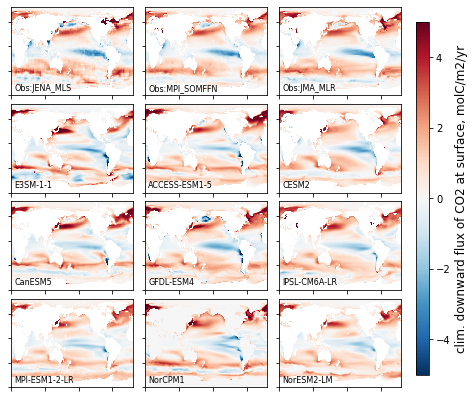

In [7]:
fid=open('woafgco2.txt','r')
fn=fid.read().splitlines()
N=np.size(fn)

fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# plot obs first
oind=0 #JENA
wind=2 #JRA55
temp=-fgco2o.sel(product=prodlabel[oind],wind=windlabel[wind]).to_numpy()
fgco2obs=np.roll(temp,180,axis=1)
ax = fig.add_subplot(4, 3, 1)
im=plt.pcolormesh(fgco2obs,vmin=-5,vmax=5,cmap='RdBu_r')
plt.text(10,10,'Obs:'+prodlabel[oind],fontsize=8)
ax.set_yticklabels([])
ax.set_xticklabels([])

oind=1 #MPI_SOMFFN
wind=2 #JRA55
temp=-fgco2o.sel(product=prodlabel[oind],wind=windlabel[wind]).to_numpy()
fgco2obs=np.roll(temp,180,axis=1)
ax = fig.add_subplot(4, 3, 2)
im=plt.pcolormesh(fgco2obs,vmin=-5,vmax=5,cmap='RdBu_r')
plt.text(10,10,'Obs:'+prodlabel[oind],fontsize=8)
ax.set_yticklabels([])
ax.set_xticklabels([])

oind=4 #JMA
wind=2 #JRA55
temp=-fgco2o.sel(product=prodlabel[oind],wind=windlabel[wind]).to_numpy()
fgco2obs=np.roll(temp,180,axis=1)
ax = fig.add_subplot(4, 3, 3)
im=plt.pcolormesh(fgco2obs,vmin=-5,vmax=5,cmap='RdBu_r')
plt.text(10,10,'Obs:'+prodlabel[oind],fontsize=8)
ax.set_yticklabels([])
ax.set_xticklabels([])

for n in range(0,N):
    fn0=fn[n]
    ds=xr.open_dataset(fn0)
    if (n==0):
        cfac=365.25*86400
        model='E3SM-1-1'
    else:
        cfac=365.25*86400/12.*1.e+3
        model=ds.attrs['parent_source_id']
    ax = fig.add_subplot(4, 3, n+4)
    sstm=ds.fgco2.sel(time=slice("1990-01-01","2014-12-31")).mean(dim='time')
    delT=np.squeeze(sstm.to_numpy())*cfac
    im=plt.pcolormesh(delT,vmin=-5,vmax=5,cmap='RdBu_r')
    plt.text(10,10,model,fontsize=8)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.93, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.ylabel('clim. downward flux of CO2 at surface, molC/m2/yr',fontsize=12)

wn='fig_fgco2clim'
! mkdir -p fig
plt.savefig('fig/'+wn+'.pdf',bbox_inches="tight")
plt.savefig('fig/'+wn+'.png',bbox_inches="tight")
plt.show()

### Next plot the difference between climatological CO2 flux

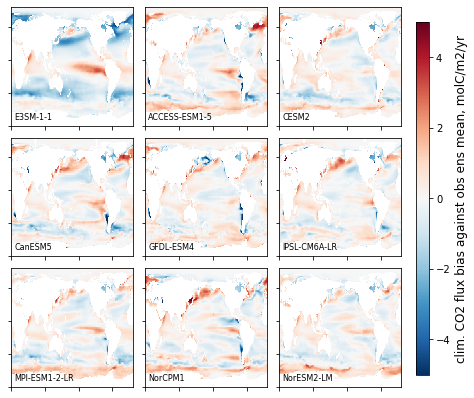

In [8]:
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
# calculate obs first
temp=-fgco2o.mean(('product','wind')).to_numpy()
fgco2obs=np.roll(temp,180,axis=1)
# loop over cmip6 models
for n in range(0,N):
    fn0=fn[n]
    ds=xr.open_dataset(fn0)
    if (n==0):
        cfac=365.25*86400*1.e-3
        model='E3SM-1-1'
    else:
        cfac=365.25*86400/12.*1.e+3
        model=ds.attrs['parent_source_id']
        
    ax = fig.add_subplot(3, 3, n+1)
    sstm=ds.fgco2.sel(time=slice("1990-01-01","2014-12-31")).mean(dim='time')
    delT=np.squeeze(sstm.to_numpy())*cfac - fgco2obs
    im=plt.pcolormesh(delT,vmin=-5,vmax=5,cmap='RdBu_r')
    plt.text(10,10,model,fontsize=8)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.93, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.ylabel('clim. CO2 flux bias against obs ens mean, molC/m2/yr',fontsize=12)

wn='fig_fgco2bias_'+str(prodlabel[oind])+'_'+str(windlabel[wind])
! mkdir -p fig
plt.savefig('fig/'+wn+'.pdf',bbox_inches="tight")
plt.savefig('fig/'+wn+'.png',bbox_inches="tight")
plt.show()

### Global and zonal mean air-sea CO2 flux and RMSE 

In [9]:
fid=open('woafgco2.txt','r')
fn=fid.read().splitlines()
N=np.size(fn)
# area weighted sum
R=6.37e6
dx=1.0
#
# calculate zonal mean from observational ensemble mean
fgco2oens=-fgco2o.mean(('product','wind'))
fgco2obsx=fgco2oens.mean(dim='lon')
# calculate zonal integral from observational ensemble mean
weights=np.cos(np.deg2rad(do.lat))*(R*np.pi/180*dx)**2
weights.name = "weights"
fgco2_weighted=fgco2oens.weighted(weights)
fgco2obsX=fgco2_weighted.sum(dim='lon')*12e-12 # unit conversion
# Prepare array for models
co2uptake_global=np.empty((N,))
model=np.empty((N,)).astype(str)
rmse=np.empty((N,))
fgco2x=np.empty((180,N))
delfgco2x=np.empty((180,N))
fgco2X=np.empty((180,N))
delfgco2X=np.empty((180,N))
#
for n in range(0,N):
    fn0=fn[n]
    ds=xr.open_dataset(fn0)
    if (n==0):
        cfac=365.25*86400
        model[n]='E3SM-1-1'
    else:
        cfac=365.25*86400/12.*1.e+3
        model[n]=ds.attrs['parent_source_id']

    # calculate global uptake
    weights=np.cos(np.deg2rad(ds.lat))*(R*np.pi/180*dx)**2
    weights.name = "weights"
    fgco2=ds.fgco2.sel(time=slice("1990-01-01","2014-12-31")).mean(dim='time')
    fgco2_weighted=fgco2.weighted(weights)
    co2uptake_global[n]=cfac*fgco2_weighted.sum(('lon','lat'))

    # calculate zonal mean and bias
    fgco2x[:,n] = cfac*fgco2.mean(dim='lon').to_numpy()
    delfgco2x[:,n] = fgco2x[:,n]-fgco2obsx
    fgco2X[:,n]=12e-12*cfac*fgco2_weighted.sum(dim='lon')
    delfgco2X[:,n]=fgco2X[:,n]-fgco2obsX
    
    # calculate RMSE
    delc2=(fgco2*cfac-fgco2oens)**2
    weights=np.cos(np.deg2rad(ds.lat))
    weights.name = "weights"
    delc2_weighted=delc2.weighted(weights)
    rmse[n]=np.sqrt(delc2_weighted.mean(('lon','lat')))
    

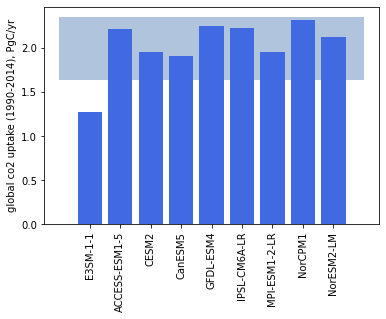

In [10]:
x=np.arange(0,N,1)
Y=[1.64, 1.64, 2.35, 2.35]
X=[-1, N, N, -1]
plt.fill(X,Y,facecolor='lightsteelblue')

plt.bar(x,co2uptake_global*12e-15,facecolor='royalblue')
plt.xticks(x,model,rotation=90)
plt.ylabel('global co2 uptake (1990-2014), PgC/yr')

wn='fig_global_co2uptake'
! mkdir -p fig
plt.savefig('fig/'+wn+'.pdf',bbox_inches="tight")
plt.savefig('fig/'+wn+'.png',bbox_inches="tight")
plt.show()

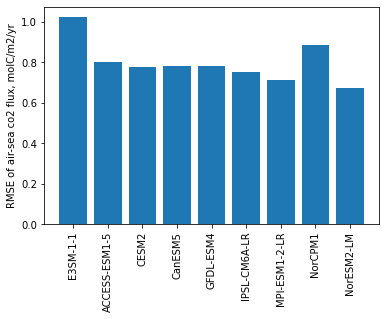

In [11]:
x=np.arange(0,N,1)
plt.bar(x,rmse)
plt.xticks(x,model,rotation=90)
plt.ylabel('RMSE of air-sea co2 flux, molC/m2/yr')
wn='fig_rmse_fgco2'
! mkdir -p fig
plt.savefig('fig/'+wn+'.pdf',bbox_inches="tight")
plt.savefig('fig/'+wn+'.png',bbox_inches="tight")
plt.show()

### Zonal mean comparison, flux per unit area

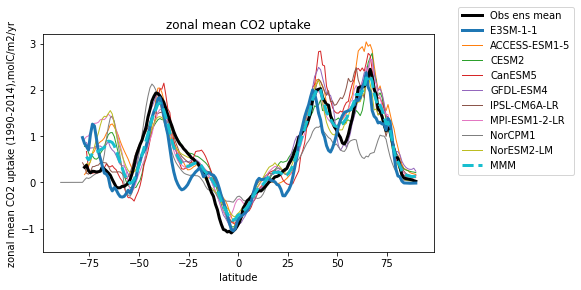

In [12]:
fig=plt.figure(figsize=(7,4))
# plot obs first
plt.plot(ds.lat,fgco2obsx,'k',linewidth=3,zorder=99)
for n in range(0,N):
    if n==0:
        plt.plot(ds.lat,fgco2x[:,n],linewidth=3,zorder=100)
    else:
        plt.plot(ds.lat,fgco2x[:,n],linewidth=1)
plt.plot(ds.lat,np.mean(fgco2x,1),'--',linewidth=3,zorder=101)
lab=np.concatenate(('Obs ens mean',model,'MMM'),axis=None,dtype='str')
plt.xlabel('latitude')
plt.ylim(-1.5,3.2)
plt.ylabel('zonal mean CO2 uptake (1990-2014),molC/m2/yr')
plt.legend(lab,bbox_to_anchor=(1.05,1.15))
plt.title('zonal mean CO2 uptake')
wn='fig_fgco2_xave'
! mkdir -p fig
plt.savefig('fig/'+wn+'.pdf',bbox_inches="tight")
plt.savefig('fig/'+wn+'.png',bbox_inches="tight")
plt.show()

### Zonal mean comparison, flux per latitude band, GgC/yr/deg

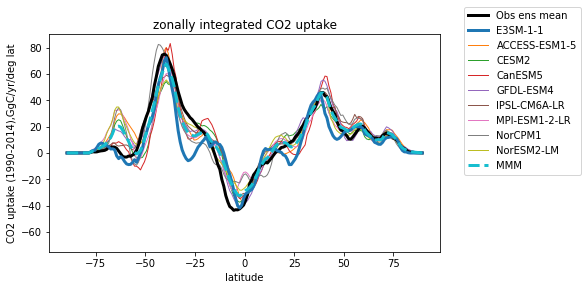

In [13]:
fig=plt.figure(figsize=(7,4))
plt.plot(ds.lat,fgco2obsX,'k',linewidth=3,zorder=99)
for n in range(0,N):
    if n==0:
        plt.plot(ds.lat,fgco2X[:,n],linewidth=3,zorder=100)
    else:
        plt.plot(ds.lat,fgco2X[:,n],linewidth=1)
plt.plot(ds.lat,np.mean(fgco2X,1),'--',linewidth=3,zorder=101)
lab=np.concatenate(('Obs ens mean',model,'MMM'),axis=None,dtype='str')
plt.xlabel('latitude')
plt.ylim(-75,90)
plt.ylabel('CO2 uptake (1990-2014),GgC/yr/deg lat')
plt.legend(lab,bbox_to_anchor=(1.05,1.15))
plt.title('zonally integrated CO2 uptake')
wn='fig_fgco2_xint'
! mkdir -p fig
plt.savefig('fig/'+wn+'.pdf',bbox_inches="tight")
plt.savefig('fig/'+wn+'.png',bbox_inches="tight")
plt.show()

### model-obs difference

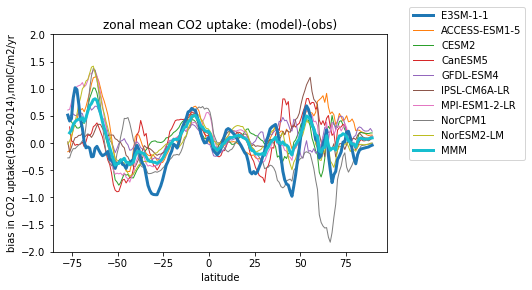

In [14]:
for n in range(0,N):
    if n==0:
        plt.plot(ds.lat,delfgco2x[:,n],linewidth=3,zorder=100)
    else:
        plt.plot(ds.lat,delfgco2x[:,n],linewidth=1)
plt.plot(ds.lat,np.mean(delfgco2x,1),linewidth=3,zorder=101)
plt.xlabel('latitude')
plt.ylim(-2,2)
plt.ylabel('bias in CO2 uptake(1990-2014),molC/m2/yr')
lab=np.concatenate((model,'MMM'),axis=None,dtype='str')
plt.legend(lab,bbox_to_anchor=(1.05,1.15))
plt.title('zonal mean CO2 uptake: (model)-(obs)')
wn='fig_delfgco2_xave'
! mkdir -p fig
plt.savefig('fig/'+wn+'.pdf',bbox_inches="tight")
plt.savefig('fig/'+wn+'.png',bbox_inches="tight")
plt.show()

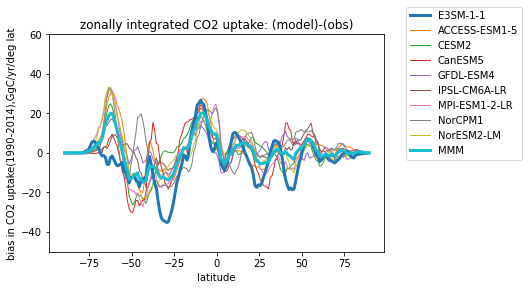

In [15]:
for n in range(0,N):
    if n==0:
        plt.plot(ds.lat,delfgco2X[:,n],linewidth=3,zorder=100)
    else:
        plt.plot(ds.lat,delfgco2X[:,n],linewidth=1)
plt.plot(ds.lat,np.mean(delfgco2X,1),linewidth=3,zorder=101)
plt.xlabel('latitude')
plt.ylim(-50,60)
plt.ylabel('bias in CO2 uptake(1990-2014),GgC/yr/deg lat')
plt.legend(lab,bbox_to_anchor=(1.05,1.15))
plt.title('zonally integrated CO2 uptake: (model)-(obs)')
wn='fig_delfgco2_xint'
! mkdir -p fig
plt.savefig('fig/'+wn+'.pdf',bbox_inches="tight")
plt.savefig('fig/'+wn+'.png',bbox_inches="tight")
plt.show()

## North Atlantic Time Series

### surface carbonate chemistry

In [17]:
# get E3SM-1-1 data first
mdir='/global/cfs/cdirs/m3920/dataset/cmip6/E3SM-1-1/'
cfn='dissic_Oyr_E3SM-1-1_historical_r1i1p1f1_gwoa13cpL33_1850-2014.nc'
afn='talk_Oyr_E3SM-1-1_historical_r1i1p1f1_gwoa13cpL33_1850-2014.nc'
tfn='tos_E3SM-1-1_historical_r1i1p1f1_gr_185001-201412.nc'
sfn='sos_E3SM-1-1_historical_r1i1p1f1_gr_185001-201412.nc'
#
dc=xr.open_dataset(mdir+cfn)
dic=dc.dissic.sel(time=slice('1990-01-01','2014-12-31')).mean(dim='time')
sdic=dic.sel(lev=0,method='nearest').to_numpy()
#sdic=dic.sel(lev=0,method='nearest').to_numpy()
#
da=xr.open_dataset(mdir+afn)
alk=da.talk.sel(time=slice('1990-01-01','2014-12-31')).mean(dim='time')
salk=alk.sel(lev=0,method='nearest').to_numpy()
#salk=alk.sel(lev=0,method='nearest').to_numpy()
#
dt=xr.open_dataset(mdir+tfn)
sst=dt.tos.sel(time=slice('1990-01-01','2014-12-31')).mean(dim='time').to_numpy()
#
ds=xr.open_dataset(mdir+sfn)
sss=ds.sos.sel(time=slice('1990-01-01','2014-12-31')).mean(dim='time').to_numpy()
print(dc.dissic.attrs)
print(da.talk.attrs)

{'long_name': 'Dissolved Inorganic Carbon', 'units': 'mmol m^{-3}'}
{'long_name': 'Alkalinity', 'units': 'meq m^{-3}'}


In [18]:
# get CESM2
mdir='/global/cfs/cdirs/m3920/dataset/cmip6/CESM2/'
cfn='dissicos_Omon_CESM2_historical_r1i1p1f1_gr_185001-201412.nc'
afn='talkos_Omon_CESM2_historical_r1i1p1f1_gr_185001-201412.nc'
tfn='tos_Omon_CESM2_historical_r1i1p1f1_gr_185001-201412.nc'
sfn='sos_Omon_CESM2_historical_r1i1p1f1_gr_185001-201412.nc'
#
dc=xr.open_dataset(mdir+cfn)
sdic2=1.e3*dc.dissicos.sel(time=slice('1990-01-01','2014-12-31')).mean(dim='time').to_numpy()
#
da=xr.open_dataset(mdir+afn)
salk2=1.e3*da.talkos.sel(time=slice('1990-01-01','2014-12-31')).mean(dim='time').to_numpy()
#
dt=xr.open_dataset(mdir+tfn)
sst2=dt.tos.sel(time=slice('1990-01-01','2014-12-31')).mean(dim='time').to_numpy()
#
ds=xr.open_dataset(mdir+sfn)
sss2=ds.sos.sel(time=slice('1990-01-01','2014-12-31')).mean(dim='time').to_numpy()
print(dc.dissicos.attrs)
print(da.talkos.attrs)

/global/homes/t/takaito/miniconda3/envs/calc/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'dissicos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/global/homes/t/takaito/miniconda3/envs/calc/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'talkos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/global/homes/t/takaito/miniconda3/envs/calc/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/global/homes/t/takaito/miniconda3/envs/calc/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'sos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


{'cell_measures': 'area: areacello', 'cell_methods': 'area: mean where sea time: mean', 'comment': 'Model data on the 1x1 grid includes values in all cells for which ocean cells on the native grid cover more than 52.5 percent of the 1x1 grid cell. This 52.5 percent cutoff was chosen to produce ocean surface area on the 1x1 grid as close as possible to ocean surface area on the native grid, while not introducing fractional cell coverage.', 'description': 'Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration', 'frequency': 'mon', 'id': 'dissicos', 'long_name': 'Surface Dissolved Inorganic Carbon Concentration', 'mipTable': 'Omon', 'out_name': 'dissicos', 'prov': 'Omon ((isd.003))', 'realm': 'ocnBgchem', 'standard_name': 'mole_concentration_of_dissolved_inorganic_carbon_in_sea_water', 'time': 'time', 'time_label': 'time-mean', 'time_title': 'Temporal mean', 'title': 'Surface Dissolved Inorganic Carbon Concentration', 'type': 'real', 'units': 'mol m-3', 'variable_id': 'dissicos'}
{'ce

In [19]:
# get observations
odir='/global/cfs/cdirs/m3920/dataset/ocean/GLODAPv2/GLODAPv2.2016b_MappedClimatologies/'
cfn='GLODAPv2.2016b.TCO2.nc'
afn='GLODAPv2.2016b.TAlk.nc'
tfn='GLODAPv2.2016b.temperature.nc'
sfn='GLODAPv2.2016b.salinity.nc'
dc=xr.open_dataset(odir+cfn)
sdico=dc.TCO2[0,:,:].to_numpy()
da=xr.open_dataset(odir+afn)
salko=da.TAlk[0,:,:].to_numpy()
ds=xr.open_dataset(odir+sfn)
ssso=ds.salinity[0,:,:].to_numpy()
dt=xr.open_dataset(odir+tfn)
ssto=dt.temperature[0,:,:].to_numpy()
print(dc.TCO2.attrs)

{'long_name': 'moles of dissolved inorganic carbon per unit mass in seawater', 'units': 'micro-mol kg-1', 'Description': 'The GLODAPv2.2016b input data were normalized to the year 2002 using anthropogenic carbon calculated with the TTD method prior to mapping.', 'time_period': 'For all surfaces (1-33) data from the years 1972-2013 inclusive have been used for mapping'}


In [20]:
# solve carbonate chemistry for E3SM
kwargs = {
    "par1": salk,
    "par2": sdic,
    "par1_type": 1,
    "par2_type": 2,
    "temperature": sst,
    "salinity": sss,
}
result=pyco2.sys(**kwargs)

In [21]:
# solve carbonate chemistry for CESM2
kwargs = {
    "par1": salk2,
    "par2": sdic2,
    "par1_type": 1,
    "par2_type": 2,
    "temperature": sst2,
    "salinity": sss2,
}
result2=pyco2.sys(**kwargs)

In [22]:
# solve carbonate chemistry for obs
kwargs = {
    "par1": salko,
    "par2": sdico,
    "par1_type": 1,
    "par2_type": 2,
    "temperature": ssto,
    "salinity": ssso,
}
resulto=pyco2.sys(**kwargs)

/tmp/ipykernel_25271/2265819663.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ds.lon,ds.lat,delCO3,vmin=-60,vmax=60,cmap='RdBu_r')


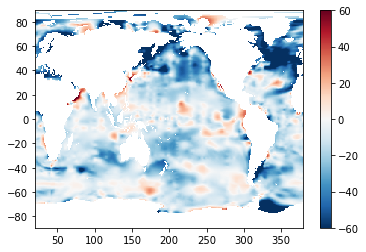

In [23]:
## compare CO3
delCO3=result['carbonate']-np.roll(resulto['carbonate'],20,1)
plt.pcolormesh(ds.lon,ds.lat,delCO3,vmin=-60,vmax=60,cmap='RdBu_r')
plt.colorbar()
plt.show()

/tmp/ipykernel_25271/3694329587.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ds.lon,ds.lat,delHCO3,vmin=-100,vmax=100,cmap='RdBu_r')


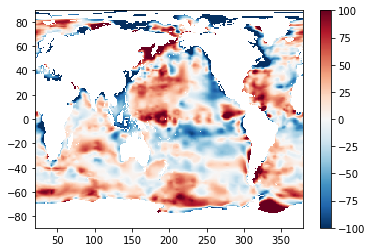

In [24]:
## compare HCO3
delHCO3=result['bicarbonate']-np.roll(resulto['bicarbonate'],20,1)
plt.pcolormesh(ds.lon,ds.lat,delHCO3,vmin=-100,vmax=100,cmap='RdBu_r')
plt.colorbar()
plt.show()

/tmp/ipykernel_25271/1308437617.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ds.lon,ds.lat,delCO2,vmin=-10,vmax=10,cmap='RdBu_r')


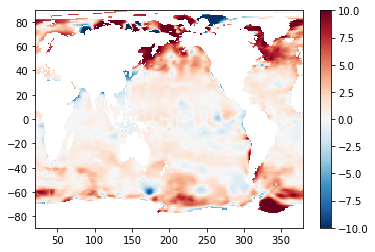

In [25]:
## compare CO2
delCO2=result['aqueous_CO2']-np.roll(resulto['aqueous_CO2'],20,1)
plt.pcolormesh(ds.lon,ds.lat,delCO2,vmin=-10,vmax=10,cmap='RdBu_r')
plt.colorbar()
plt.show()

/tmp/ipykernel_25271/4151143855.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ds.lon,ds.lat,delpCO2,vmin=-150,vmax=150,cmap='RdBu_r')


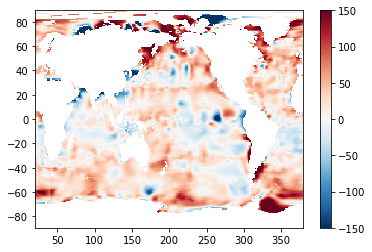

In [26]:
## compare pCO2
delpCO2=result['pCO2']-np.roll(resulto['pCO2'],20,1)
plt.pcolormesh(ds.lon,ds.lat,delpCO2,vmin=-150,vmax=150,cmap='RdBu_r')
plt.colorbar()
plt.show()

/tmp/ipykernel_25271/1194877296.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(ds.lon,ds.lat,delpH,vmin=-.2,vmax=.2,cmap='RdBu_r')


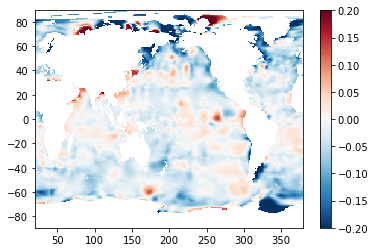

In [27]:
## compare pH
delpH=result['pH']-np.roll(resulto['pH'],20,1)
plt.pcolormesh(ds.lon,ds.lat,delpH,vmin=-.2,vmax=.2,cmap='RdBu_r')
plt.colorbar()
plt.show()

### Zonal mean analysis

/tmp/ipykernel_25271/878675080.py:1: RuntimeWarning: Mean of empty slice
  pco2=np.nanmean(result['pCO2'],axis=1)
/tmp/ipykernel_25271/878675080.py:2: RuntimeWarning: Mean of empty slice
  pco22=np.nanmean(result2['pCO2'],axis=1)
/tmp/ipykernel_25271/878675080.py:3: RuntimeWarning: Mean of empty slice
  pco2o=np.nanmean(resulto['pCO2'],axis=1)


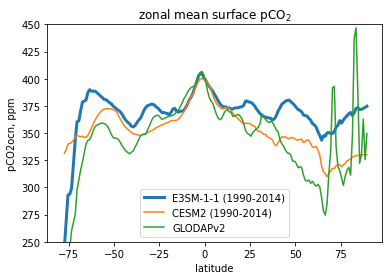

In [28]:
pco2=np.nanmean(result['pCO2'],axis=1)
pco22=np.nanmean(result2['pCO2'],axis=1)
pco2o=np.nanmean(resulto['pCO2'],axis=1)
plt.plot(ds.lat,pco2,label='E3SM-1-1 (1990-2014)',linewidth=3)
plt.plot(ds.lat,pco22,label='CESM2 (1990-2014)')
plt.plot(ds.lat,pco2o,label='GLODAPv2')
plt.xlabel('latitude')
plt.ylabel('pCO2ocn, ppm')
plt.ylim(250,450)
plt.title('zonal mean surface pCO$_2$')
plt.legend()
plt.show()

/tmp/ipykernel_25271/2230901696.py:1: RuntimeWarning: Mean of empty slice
  pco2=np.nanmean(sdic,axis=1)
/tmp/ipykernel_25271/2230901696.py:2: RuntimeWarning: Mean of empty slice
  pco22=np.nanmean(sdic2,axis=1)
/tmp/ipykernel_25271/2230901696.py:3: RuntimeWarning: Mean of empty slice
  pco2o=np.nanmean(sdico,axis=1)


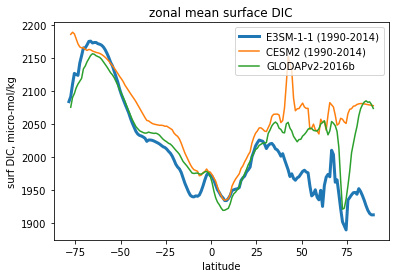

In [29]:
pco2=np.nanmean(sdic,axis=1)
pco22=np.nanmean(sdic2,axis=1)
pco2o=np.nanmean(sdico,axis=1)
plt.plot(ds.lat,pco2,label='E3SM-1-1 (1990-2014)',linewidth=3)
plt.plot(ds.lat,pco22,label='CESM2 (1990-2014)')
plt.plot(ds.lat,pco2o,label='GLODAPv2-2016b')
plt.xlabel('latitude')
plt.ylabel('surf DIC, micro-mol/kg')
#plt.ylim(250,450)
plt.title('zonal mean surface DIC')
plt.legend()
plt.show()

/tmp/ipykernel_25271/4069634757.py:1: RuntimeWarning: Mean of empty slice
  pco2=np.nanmean(salk,axis=1)
/tmp/ipykernel_25271/4069634757.py:2: RuntimeWarning: Mean of empty slice
  pco22=np.nanmean(salk2,axis=1)
/tmp/ipykernel_25271/4069634757.py:3: RuntimeWarning: Mean of empty slice
  pco2o=np.nanmean(salko,axis=1)


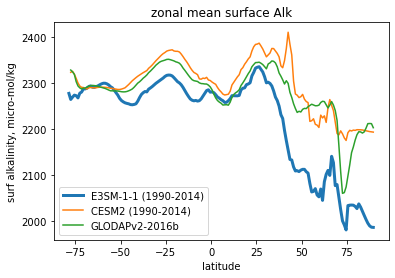

In [30]:
pco2=np.nanmean(salk,axis=1)
pco22=np.nanmean(salk2,axis=1)
pco2o=np.nanmean(salko,axis=1)
plt.plot(ds.lat,pco2,label='E3SM-1-1 (1990-2014)',linewidth=3)
plt.plot(ds.lat,pco22,label='CESM2 (1990-2014)')
plt.plot(ds.lat,pco2o,label='GLODAPv2-2016b')
plt.xlabel('latitude')
plt.ylabel('surf alkalinity, micro-mol/kg')
#plt.ylim(250,450)
plt.title('zonal mean surface Alk')
plt.legend()
plt.show()

/tmp/ipykernel_25271/796229842.py:1: RuntimeWarning: Mean of empty slice
  pco2=np.nanmean(result['carbonate'],axis=1)
/tmp/ipykernel_25271/796229842.py:2: RuntimeWarning: Mean of empty slice
  pco22=np.nanmean(result2['carbonate'],axis=1)
/tmp/ipykernel_25271/796229842.py:3: RuntimeWarning: Mean of empty slice
  pco2o=np.nanmean(resulto['carbonate'],axis=1)


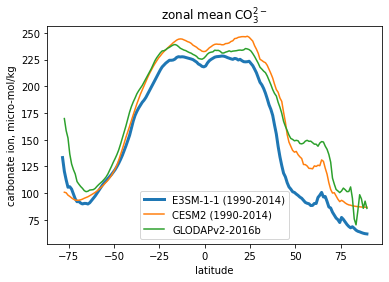

In [31]:
pco2=np.nanmean(result['carbonate'],axis=1)
pco22=np.nanmean(result2['carbonate'],axis=1)
pco2o=np.nanmean(resulto['carbonate'],axis=1)
plt.plot(ds.lat,pco2,label='E3SM-1-1 (1990-2014)',linewidth=3)
plt.plot(ds.lat,pco22,label='CESM2 (1990-2014)')
plt.plot(ds.lat,pco2o,label='GLODAPv2-2016b')
plt.xlabel('latitude')
plt.ylabel('carbonate ion, micro-mol/kg')
#plt.ylim(250,450)
plt.title('zonal mean CO$_3^{2-}$')
plt.legend()
plt.show()

/tmp/ipykernel_25271/3654334412.py:1: RuntimeWarning: Mean of empty slice
  pco2=np.nanmean(result['bicarbonate'],axis=1)
/tmp/ipykernel_25271/3654334412.py:2: RuntimeWarning: Mean of empty slice
  pco22=np.nanmean(result2['bicarbonate'],axis=1)
/tmp/ipykernel_25271/3654334412.py:3: RuntimeWarning: Mean of empty slice
  pco2o=np.nanmean(resulto['bicarbonate'],axis=1)


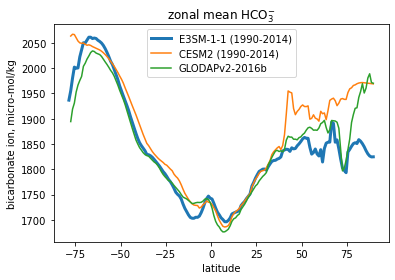

In [32]:
pco2=np.nanmean(result['bicarbonate'],axis=1)
pco22=np.nanmean(result2['bicarbonate'],axis=1)
pco2o=np.nanmean(resulto['bicarbonate'],axis=1)
plt.plot(ds.lat,pco2,label='E3SM-1-1 (1990-2014)',linewidth=3)
plt.plot(ds.lat,pco22,label='CESM2 (1990-2014)')
plt.plot(ds.lat,pco2o,label='GLODAPv2-2016b')
plt.xlabel('latitude')
plt.ylabel('bicarbonate ion, micro-mol/kg')
#plt.ylim(250,450)
plt.title('zonal mean HCO$_3^{-}$')
plt.legend()
plt.show()